# **Task #2: Prediction using Unsupervised ML**

## **K Means Clustering** using **Scikit Learn** library

### Task : Prediction of optimal no. of clusters from the **IRIS_Dataset** and visual representation

In [9]:
# Importing the necessary libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [10]:
# importing the IRIS_dataset

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
df.shape

(150, 4)

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

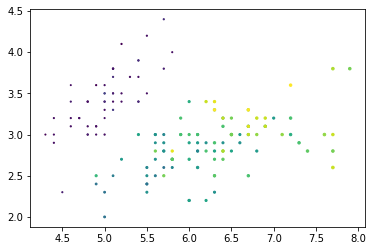

In [13]:
# Visualizing the IRIS dataset
#considering all features
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],df['petal length (cm)'],df['petal width (cm)'])

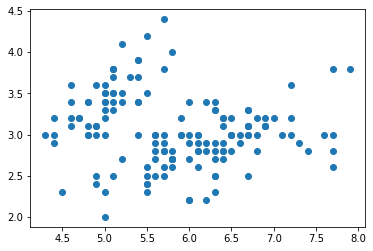

In [14]:
# considering only 2 features
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [15]:
x = df.iloc[:,[0,1,2,3]].values

In [16]:
sse = [] # sse = sum of squared errors

# Finding the optimum no. of clusters of IRIS dataset for KMeans classification
for k in range(1, 11):
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)

C:\Users\LOKESH\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384,
 26.094324740540422]

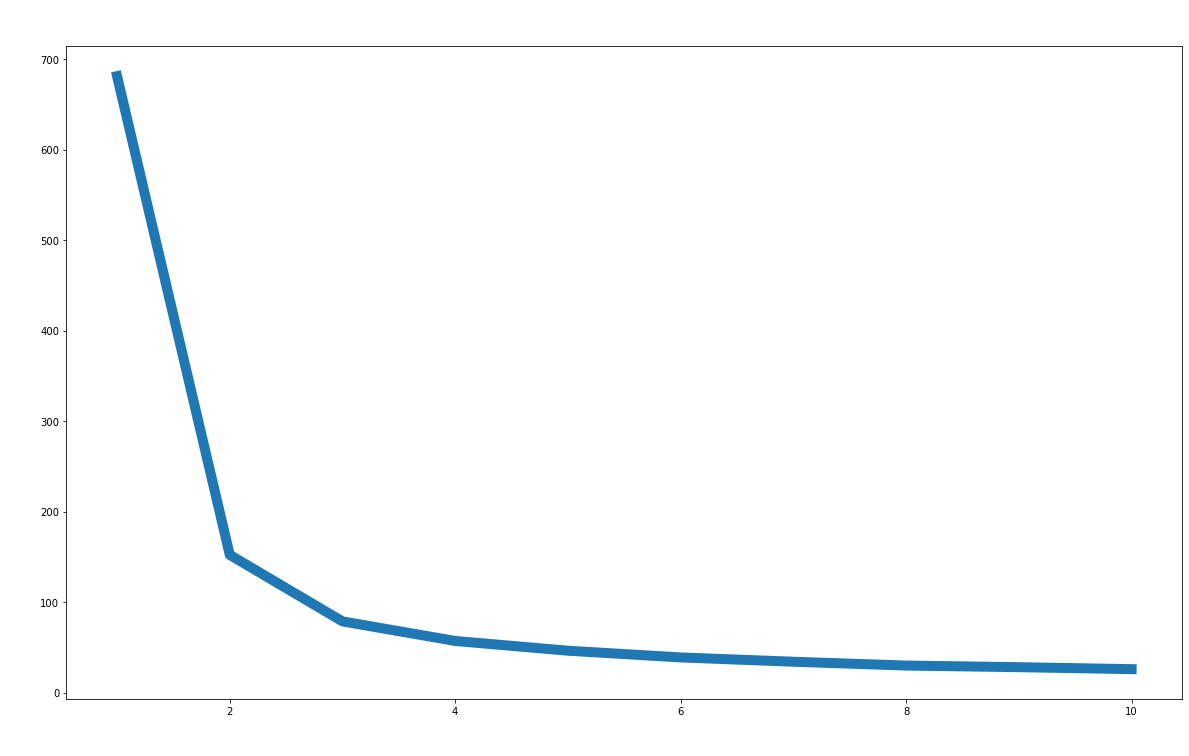

In [18]:
# Plotting the line graph (The Elobow)

plt.figure(figsize=(20,12))
plt.xlabel('No. of clusters',color='white',fontsize=30)
plt.ylabel('sse',color='white',fontsize=30)
plt.plot(range(1,11),sse,linewidth=10)
plt.title("The Elbow method", color="white",fontsize=40)
plt.show()

#### Here we can clearly see the optimum no. of clusters to be 3.Bcz the after "3", the SSE is not changing significantly.

### Hence, Optimum no. of clusters = **3**

In [19]:
# Location of centroids
km.cluster_centers_

array([[6.03684211, 2.70526316, 5.        , 1.77894737],
       [5.5125    , 4.        , 1.475     , 0.275     ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.2       , 2.36666667, 3.38333333, 1.01666667],
       [4.67894737, 3.08421053, 1.37894737, 0.2       ],
       [5.1       , 3.51304348, 1.52608696, 0.27391304],
       [5.62272727, 2.70909091, 4.11818182, 1.28636364],
       [7.43333333, 2.92222222, 6.26666667, 1.98888889],
       [6.44210526, 2.97894737, 4.59473684, 1.43157895],
       [7.6       , 3.73333333, 6.4       , 2.23333333]])

In [20]:
# creating the KMeans Dataset based on optimum no. of clusters
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = km.fit_predict(x)

In [21]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [22]:
# adding an extra column to the dataframe named cluster
df['cluster'] = y_pred
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
# Segregating the dataframe based on target names/the cluster which they belong
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

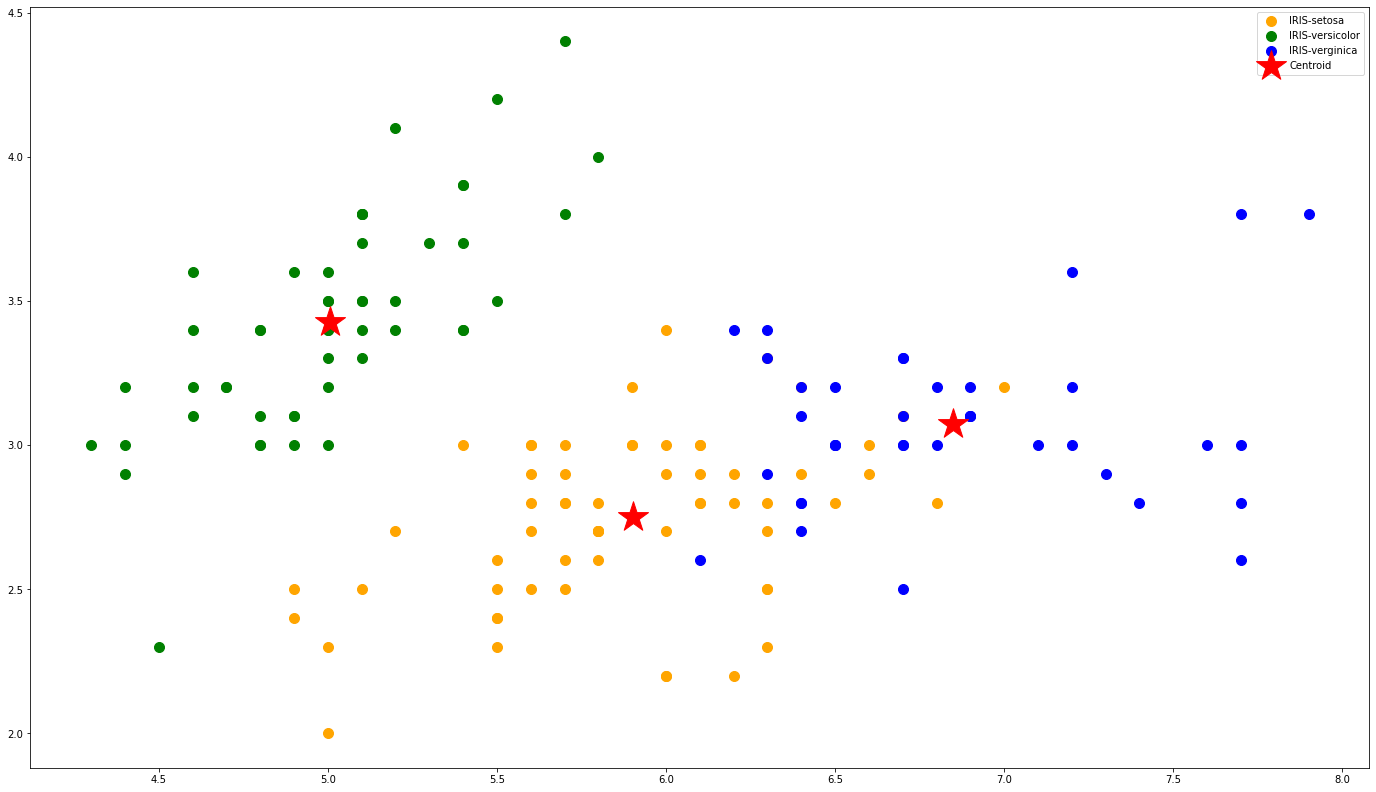

In [24]:
plt.figure(figsize=(24,14))

# plotting the clusters (considering the first two features of IRIS)
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],
            s=100, color="orange",label="IRIS-setosa")
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],
            s=100, color="green",label="IRIS-versicolor")
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],
            s=100, color="blue",label="IRIS-verginica")

# plotting centroid of the clusters
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label="Centroid",color="red",marker="*",s=1000)

plt.legend()
